## Cost of Living Abroad

### Dataset Overview
## Source
Aggregated from UNESCO, OECD, Mercer, Numbeo, government portals, ISO insurance plans, and OANDA APIs

## Columns
- Country
- City
- University
- Program
- Level
- Duration_Years
- Tuition_USD
- Living_Cost_Index
- Rent_USD
- Visa_Fee_USD
- Insurance_USD
- Exchange_Rate

In [8]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [10]:
df = pd.read_csv('/Users/simarmalhan/Downloads/International_Education_Costs.csv')
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


### Data Cleaning

In [22]:
# ensuring that we dont't have any null or zero values wherever we have cost columns

cost_columns = ['Tuition_USD', 'Rent_USD', 'Visa_Fee_USD', 'Insurance_USD']
df = df.dropna(subset = cost_columns)
df = df[(df[cost_columns] != 0).all(axis=1)]

### Exploratory Data Analysis

In [31]:
# average tuition by country

avg_tuition = df.groupby('Country')['Tuition_USD'].mean().sort_values(ascending = False)
avg_tuition.head()

Country
USA          47742.307692
Australia    34610.465116
Singapore    34172.222222
UK           30341.935484
Canada       29456.578947
Name: Tuition_USD, dtype: float64

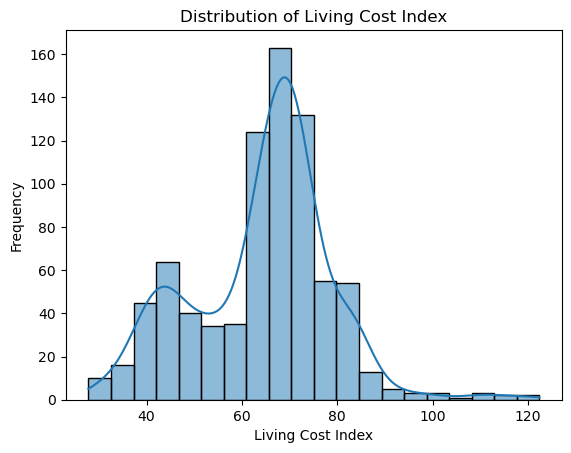

In [46]:
# Distribution of Living Cost Index

sns.histplot(df['Living_Cost_Index'], bins = 20, kde = True)
plt.title('Distribution of Living Cost Index')
plt.xlabel('Living Cost Index')
plt.ylabel('Frequency')
plt.show()

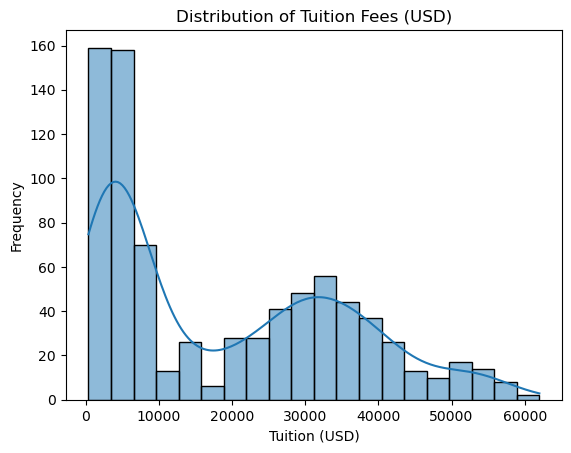

In [44]:
# Distribution of Tuition Costs

sns.histplot(df['Tuition_USD'], bins = 20, kde = True)
plt.title('Distribution of Tuition Fees (USD)')
plt.xlabel('Tuition (USD)')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Tuition_USD', ylabel='Country'>

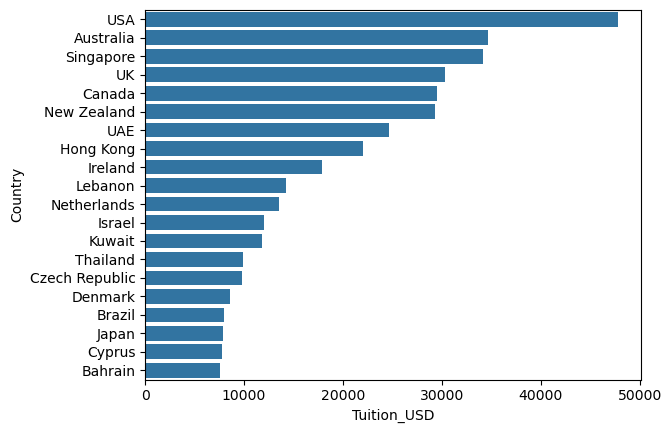

In [52]:
# Average Tuition Fee by Country

sns.barplot(data = avg_tuition.head(20), orient = 'h')

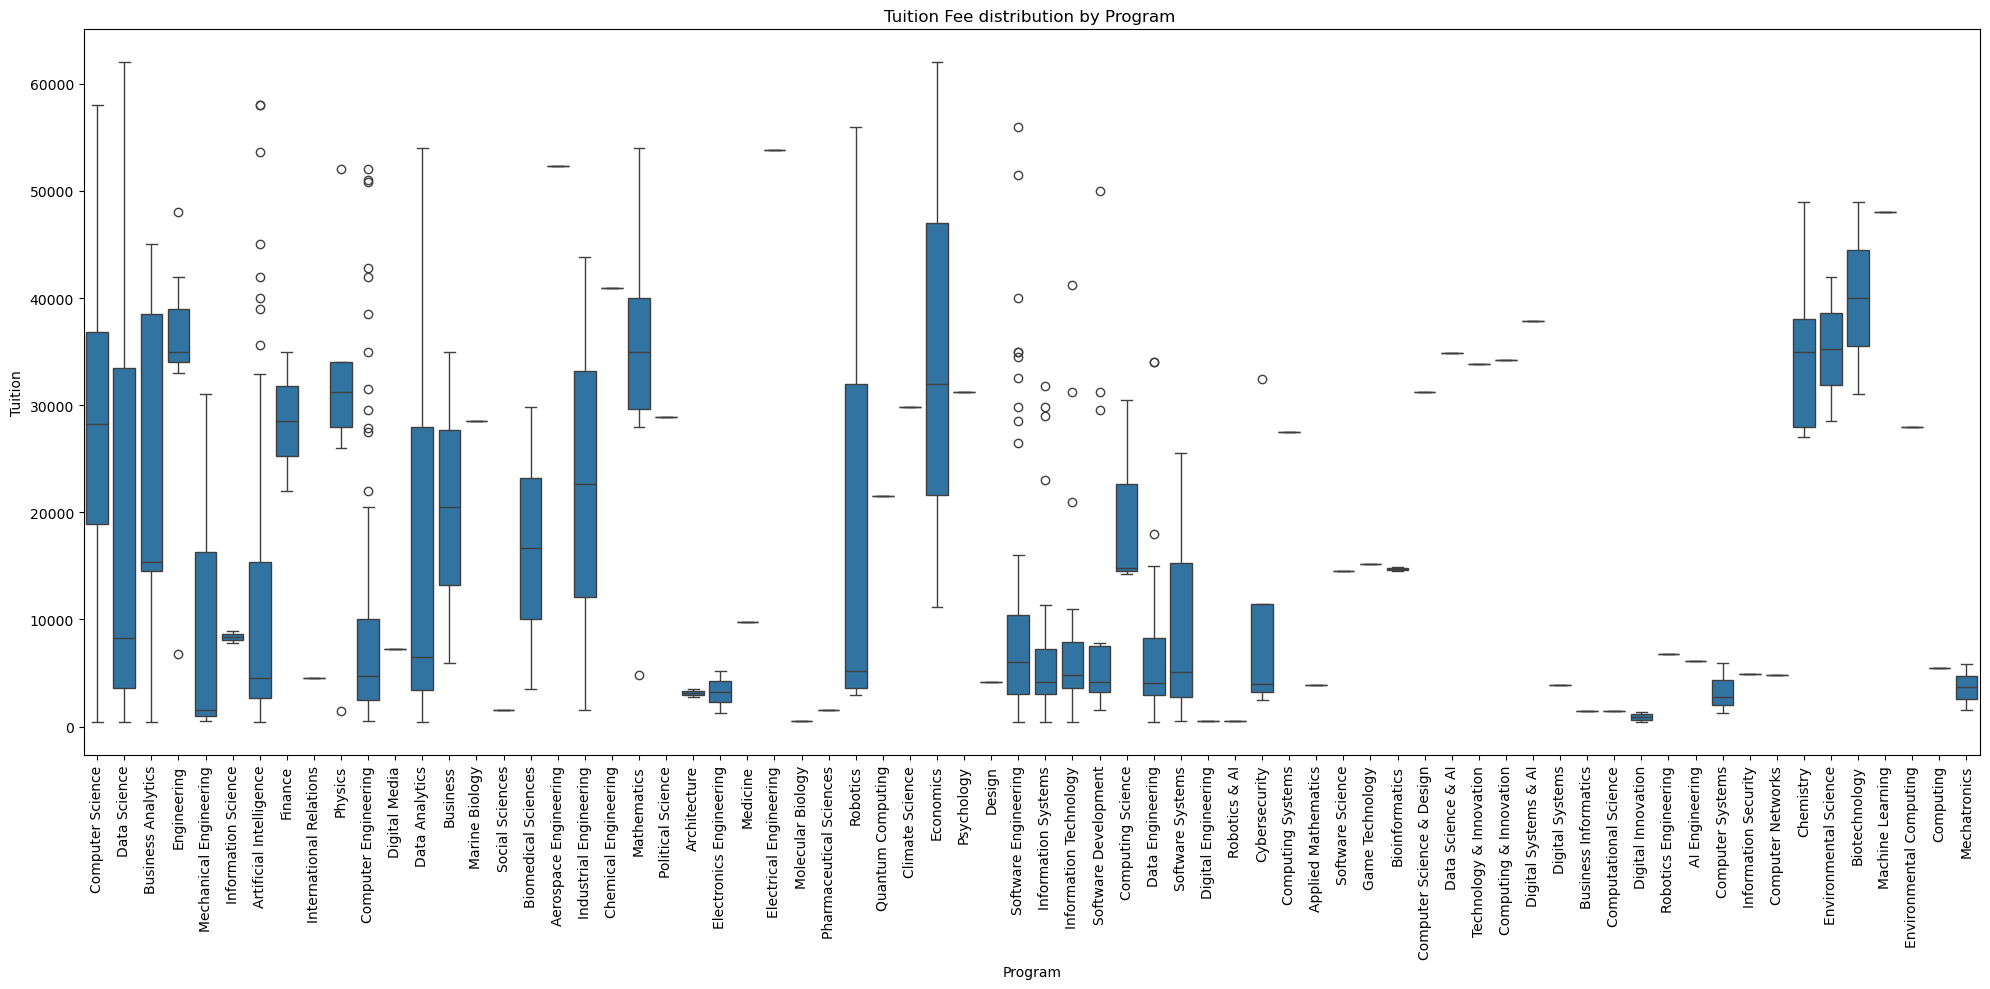

In [58]:
# Boxplot of Tuition Fees

plt.figure(figsize = (20, 10))
sns.boxplot(data = df, y = 'Tuition_USD', x = 'Program')
plt.title('Tuition Fee distribution by Program ')
plt.xlabel('Program')
plt.ylabel('Tuition')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Rent vs Living Cost Index')

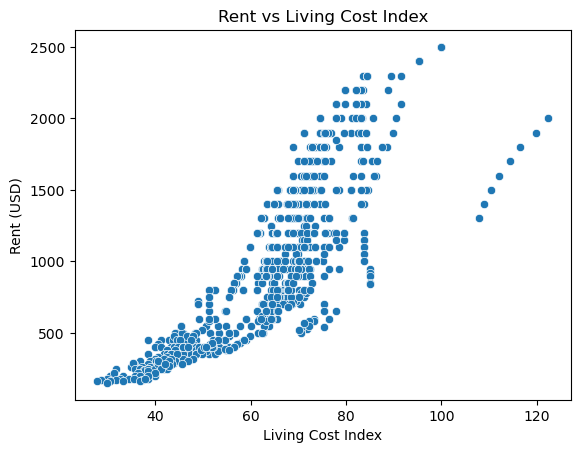

In [66]:
# Living vs Rent Costs

sns.scatterplot(data = df, y = 'Rent_USD', x = 'Living_Cost_Index')
plt.xlabel('Living Cost Index')
plt.ylabel('Rent (USD)')
plt.title('Rent vs Living Cost Index')

**Positive Correlation:** There's a clear positive correlation between the Living Cost Index and Rent prices - as the living cost index increases, rent tends to increase as well.

**Non-Linear Relationship:** The relationship appears somewhat exponential rather than strictly linear, with rent increasing more rapidly at higher living cost index values.

**Data Clustering:** There's significant clustering of data points in the 60-80 range of the Living Cost Index, suggesting this is a common cost of living range in the dataset.

**Price Variability:** For any given Living Cost Index value, there's considerable variation in rent prices, particularly in the middle range (60-90), indicating that factors beyond the general cost of living affect rent.

**Outliers:** There are some notable outliers, particularly in the upper right region (high index, high rent) that might represent premium or luxury markets.

**Price Ceiling:** Few data points exceed $2,500 USD in rent, suggesting a potential ceiling in the dataset or market.


### Visualizations

#### Tuition Distribution by Degree

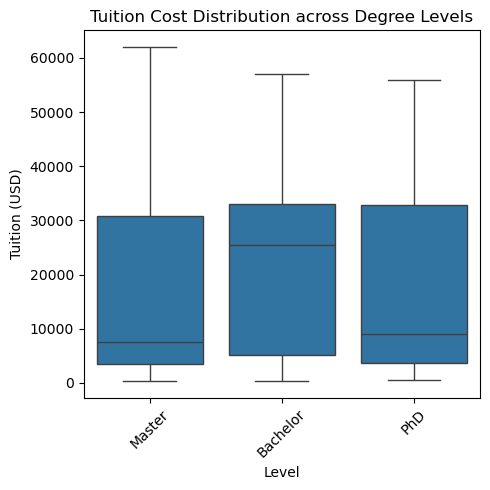

In [82]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Level', y='Tuition_USD', data=df)
plt.ylabel('Tuition (USD)')
plt.title('Tuition Cost Distribution across Degree Levels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Living Cost vs Tuition

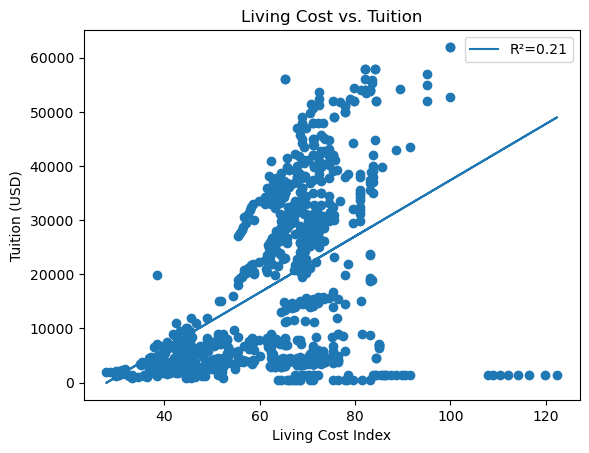

In [106]:
x = df['Living_Cost_Index']
y = df['Tuition_USD']

slope, intercept, r, p, stderr = linregress(x, y)

plt.scatter(x, y)
plt.plot(x, intercept + slope*x, label=f"R²={r**2:.2f}")
plt.xlabel('Living Cost Index')
plt.ylabel('Tuition (USD)')
plt.title('Living Cost vs. Tuition')
plt.legend()
plt.show()

### Correlation matrix of cost columns

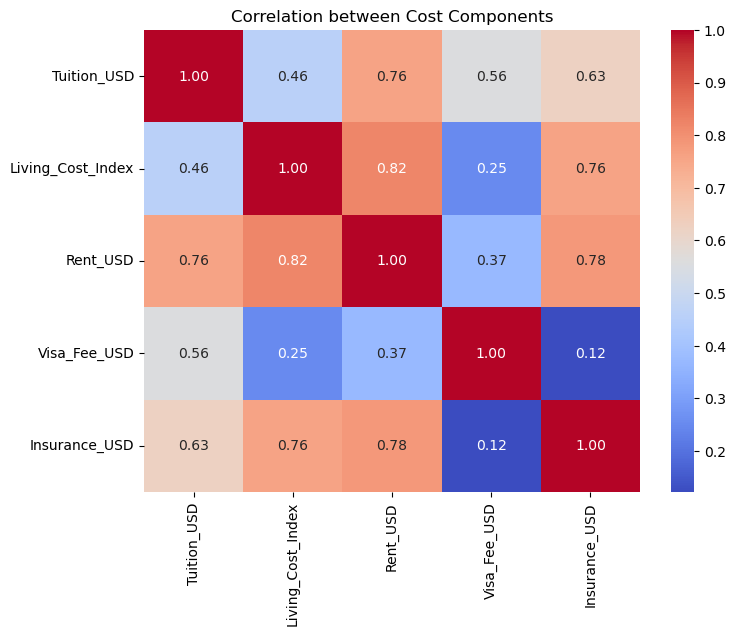

In [109]:
corr_components = df[['Tuition_USD','Living_Cost_Index','Rent_USD','Visa_Fee_USD','Insurance_USD']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_components, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between Cost Components')
plt.show()

### Number of programs per level

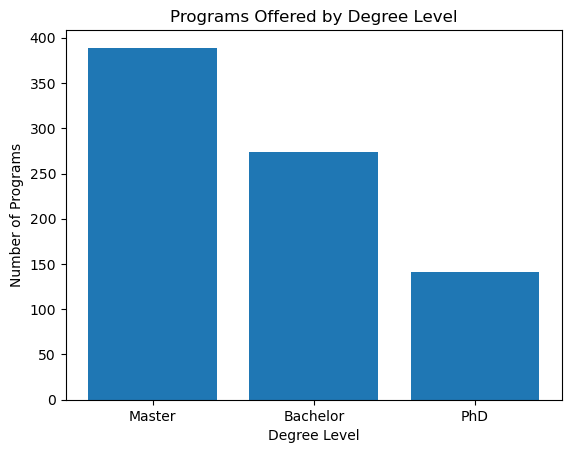

In [112]:
# Bar chart of program counts by level
grouped = df['Level'].value_counts()
import matplotlib.pyplot as plt

plt.bar(grouped.index, grouped.values)
plt.xlabel('Degree Level')
plt.ylabel('Number of Programs')
plt.title('Programs Offered by Degree Level')
plt.show()

### Living abroad cost predictor

In [117]:
label_columns = ['Country', 'City', 'University', 'Program', 'Level'] # defining the columns for labelling

# importing label encoder class from sklearn's preprocessing module
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [119]:
# looping thru each column in label_columns

for column in label_columns:
    df[column] = le.fit_transform(df[column])

In [123]:
# importing libraries for ML

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [125]:
X = df.drop(['Living_Cost_Index'], axis = 1)
y = df['Living_Cost_Index']

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [131]:
# defining a dictionary called models

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'KNeighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(verbosity = 0)
    }

Regression is basically like making predictions based on patterns. Imagine you're trying to guess how many points a basketball player will score in their next game based on how many hours they practiced. If you notice that players who practice more tend to score more points, you can use that pattern to make predictions. That's regression - finding the relationship between things to make predictions.

Ridge and Lasso are special types of regression that help make better predictions:

Ridge is like having a coach who tells you not to get too excited about any one thing. If you notice that players who wear red shoes score more points, Ridge says "don't put too much importance on shoe color." It keeps all the factors in your prediction but makes sure none of them get too much influence.

Lasso is like a coach who tells you to focus only on what really matters. If you're looking at shoe color, height, practice hours, and diet, Lasso might say "forget about shoe color and diet - just focus on height and practice hours." It completely removes the less important factors from your prediction.

Both Ridge and Lasso help make predictions more accurate by preventing you from putting too much weight on patterns that might just be coincidences in your data.

In [136]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    # append the results into the results list
    results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4)
    })

In [138]:
# converting the results list into a pandas dataframe for better readability

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)

# Print the sorted DataFrame to display model performance metrics
print(results_df)

              Model  R2 Score      MSE    RMSE     MAE
9           XGBoost    0.9765   4.0753  2.0187  1.4417
5      RandomForest    0.9754   4.2619  2.0644  1.4856
6  GradientBoosting    0.9750   4.3269  2.0801  1.5924
4      DecisionTree    0.9544   7.8828  2.8076  1.9758
7          AdaBoost    0.9240  13.1497  3.6262  2.9515
0  LinearRegression    0.8564  24.8555  4.9855  3.8872
1             Ridge    0.8564  24.8561  4.9856  3.8872
3        ElasticNet    0.8523  25.5564  5.0553  3.9551
2             Lasso    0.8484  26.2276  5.1213  4.0056
8        KNeighbors    0.8350  28.5471  5.3430  3.7029


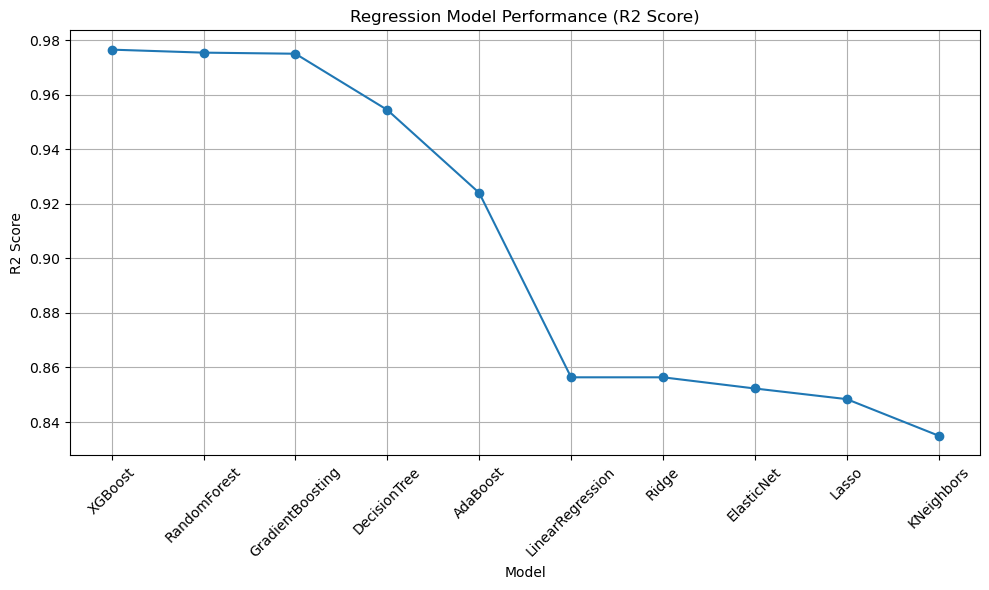

In [140]:
# Plotting: create a figure with size 10x6 inches
plt.figure(figsize=(10, 6))

plt.plot(results_df['Model'], results_df['R2 Score'], marker='o', linestyle='-')
plt.title('Regression Model Performance (R2 Score)')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Model Performance Comparison

The plot shows the performance comparison of different regression models based on their R² scores. R² (R-squared) is a statistical measure that represents how well a model explains the variance in the target variable, with values closer to 1 indicating better performance.

## Key Observations

### Tree-based Ensemble Models
Tree-based ensemble models perform significantly better than the linear models:

- **XGBoost, RandomForest, and GradientBoosting** are the top performers with R² scores around 0.97-0.98
- **DecisionTree** follows with an R² score of about 0.95
- **AdaBoost** shows moderate performance with an R² score around 0.92

### Linear Models
The linear models show notably lower performance:

- **LinearRegression, Ridge, ElasticNet, Lasso, and KNeighbors** all have R² scores between 0.83-0.86

## Conclusion
This performance gap suggests that the relationship between the features and the target variable in your dataset is likely non-linear and complex, which the tree-based models can capture better than linear models.